In [1]:
!pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras import Sequential
from tensorflow.keras.layers import RandomFlip, RandomTranslation, RandomRotation,RandomBrightness, RandomContrast, RandomZoom

2024-04-08 18:25:11.128859: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-08 18:25:11.130007: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-08 18:25:11.137063: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-08 18:25:11.202147: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX512_FP16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-08 18:25:12.222053

In [2]:
num_classes = 100

In [3]:
def preprocessing(image, label):
  image = tf.image.resize(image, (224, 224)) / 255.0
  label = tf.squeeze(tf.one_hot(label, depth = num_classes), axis = 0)
  return  image, label

augmentation_donnees_keras = Sequential([
    RandomFlip("horizontal"),
    RandomTranslation(0.2,0.2),
    RandomRotation(0.2),
    RandomZoom(0.2),
    RandomBrightness(0.2,value_range=(0,1)),
    RandomContrast(0.2)
])

def augmentation_donnees(image, label):
  return augmentation_donnees_keras(image, training = True), label

train_dataset, _ = cifar100.load_data()

train_dataset = tf.data.Dataset.from_tensor_slices(train_dataset).map(preprocessing).batch(25).prefetch(tf.data.AUTOTUNE)

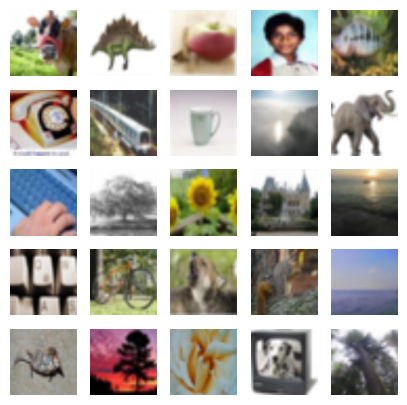

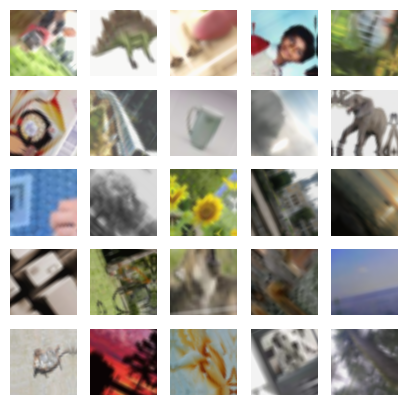

In [4]:
def afficher_premier_batch(dataset):
    images = next(iter(dataset))[0].numpy()
    plt.figure(figsize=(5, 5))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
    plt.show()

afficher_premier_batch(train_dataset)
afficher_premier_batch(train_dataset.map(augmentation_donnees))